In [1]:
import numpy as np
from logger import H5Interface
import matplotlib.pyplot as plt
# %matplotlib notebook
%matplotlib inline

In [10]:
# h = H5Interface(h5_filename='/home/adam/Desktop/force_data_lrl/trajectories.h5')
# h = H5Interface(h5_filename='/home/adam/.ros/ll4ma_robot_control/trajectories.h5')
h = H5Interface()

# resting_noise = h.get_data('trajectory_19', 'raw_data')['w_raw'][2,:]
# light = h.get_data('trajectory_20', 'raw_data')['w_raw'][2,:]
# hard = h.get_data('trajectory_17', 'raw_data')['w_raw'][2,:]
# sharp = h.get_data('trajectory_21', 'raw_data')['w_raw'][2,:]
# short_light = h.get_data('trajectory_22', 'raw_data')['w_raw'][2,:]
# long_contact = h.get_data('trajectory_23', 'raw_data')['w_raw'][2,:]
# data = np.hstack((resting_noise, light, sharp, short_light, long_contact))

data = h.get_data('trajectory_15', 'raw_data')['w_raw']


# fig = plt.figure(figsize=(12,10))
# plt.plot(data)
# plt.show()

In [11]:
def get_sliding_window_features(data, window_size=50, gap=1):
    xs = []
    max_idxs = []
    for max_idx in range(int(window_size) - 1, data.shape[1], gap):
        min_idx = int(max_idx - (window_size - 1))
        idxs = range(min_idx, max_idx + 1)
        x = data[:,idxs]
        xs.append(x)
        max_idxs.append(max_idx)
    return xs, max_idxs

In [12]:
plot = False
xs, max_idxs = get_sliding_window_features(data)
if plot:
    fig = plt.figure(figsize=(12,10))
    for x in xs:
        plt.plot(x)
    plt.show()
max_abs_mean = abs(max(np.mean(xs, axis=1)))
print "Max abs mean", max_abs_mean

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

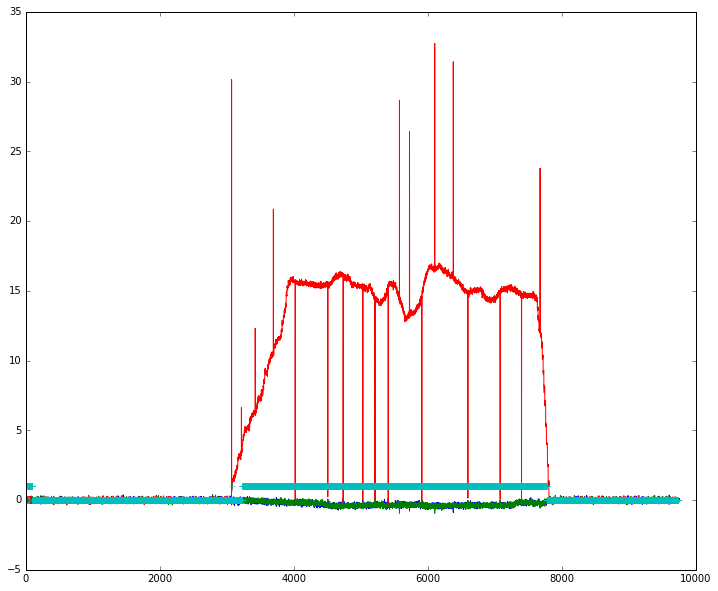

Start: 0
End: 7778


In [18]:
h = H5Interface()
data = h.get_data('trajectory_15', 'raw_data')['w_raw']
max_abs_mean = 4.0

train_xs, train_max_idxs = get_sliding_window_features(data, window_size=10)
# generate labels
ys = []
for train_x, train_max_idx in zip(train_xs, train_max_idxs):
    if abs(np.mean(np.linalg.norm(train_x, axis=0))) > max_abs_mean:
        ys.append((train_max_idx, 1))
    else:
        ys.append((train_max_idx, 0))

plot_data = [y[1] for y in ys]
        
fig = plt.figure(figsize=(12,10))
plt.plot(data[0,:])
plt.plot(data[1,:])
plt.plot(data[2,:])      
plt.plot(plot_data, 'c+')
plt.show()

print "Start:", plot_data.index(1)
print "End:", len(plot_data) - 1 - plot_data[::-1].index(1)

In [ ]:
h = H5Interface()

data = h.get_data('trajectory_3', 'raw_data')['w_raw']
xs, max_idxs = get_sliding_window_features(data, window_size=20)
# max_abs_mean_norm = max([np.mean(abs(np.linalg.norm(x, axis=0))) for x in xs])
max_abs_mean_norm = max([abs(np.mean(np.linalg.norm(x, axis=0))) for x in xs])
print max_abs_mean_norm

# fig = plt.figure(figsize=(12,10))
# plt.plot(data)
# plt.show()

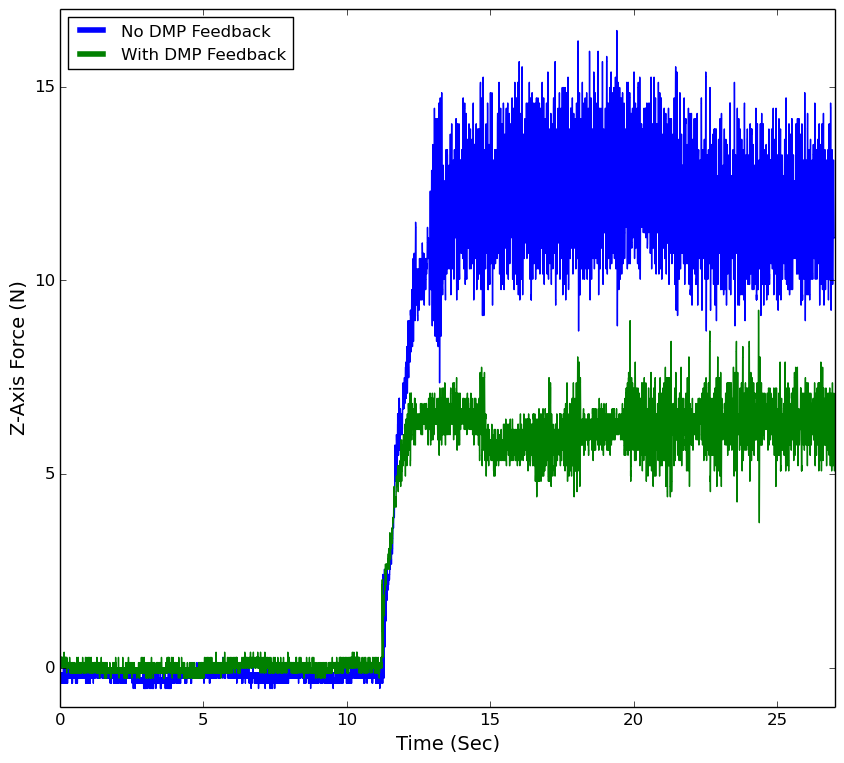

In [61]:
h = H5Interface(h5_filename='data_for_force_difference_dmp.h5')
no_fb = h.get_data('trajectory_6', 'raw_data')['w_raw'][2,2050:-91]
fb = h.get_data('trajectory_5', 'raw_data')['w_raw'][2,:27000]
fig = plt.figure(figsize=(10,9))
t = np.linspace(0, 27, 27000)
plt.plot(t, no_fb, label='No DMP Feedback')
plt.plot(t, fb, label='With DMP Feedback')
plt.xlim(0, 27)
plt.ylim(-1, 17)
plt.xlabel("Time (Sec)", fontsize=14.0)
plt.ylabel("Z-Axis Force (N)", fontsize=14.0)
plt.tick_params(axis='both', which='major', labelsize=12)
leg = plt.legend(loc=2)
for legobj in leg.legendHandles:
    legobj.set_linewidth(4.0)
plt.savefig('dmp_force_feedback.eps', format='eps', dpi=1000)

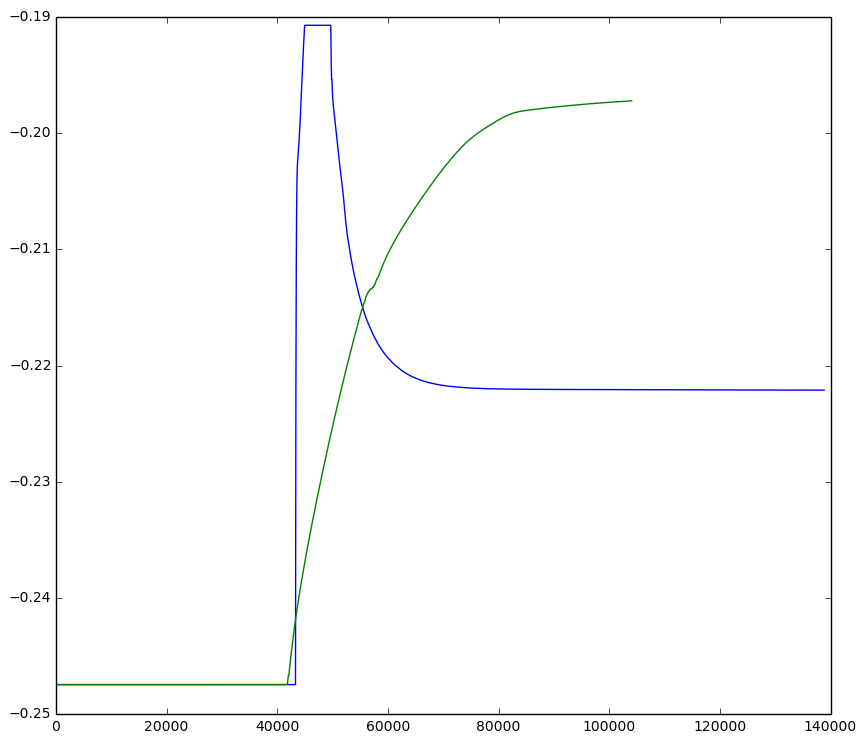

In [38]:
import os
import pickle
path = os.path.expanduser("~/.ros/ll4ma_robot_control")
filename = os.path.join(path, 'gradual_goal_change_48mm.txt')
with open(filename, 'rb') as f:
    gradual_goal = pickle.load(f)['z']
filename = os.path.join(path, 'rapid_goal_change_longer_recording.txt')
with open(filename, 'rb') as f:
    rapid_goal = pickle.load(f)['z']
fig = plt.figure(figsize=(10,9))
plt.plot(rapid_goal)
plt.plot(gradual_goal)
plt.show()